In [1]:
import os
import sys

ROOT_DIR = os.path.realpath('../..')

if ROOT_DIR not in sys.path:
    sys.path.insert(0, ROOT_DIR)

In [2]:
import os
import random

import pdfd.utils


In [52]:
DATASET_DIR = os.path.join(ROOT_DIR, 'dataset')
CELEBA_DIR = os.path.join(DATASET_DIR, 'celebA')

TRAIN_DIR = os.path.join(CELEBA_DIR, 'train')
ORIGINAL_DIR = os.path.join(TRAIN_DIR, 'original')
MASK_DIR = os.path.join(TRAIN_DIR, 'mask')

original_list = os.listdir(ORIGINAL_DIR)
mask_list = os.listdir(MASK_DIR)

VAL_DIR = os.path.join(CELEBA_DIR, 'val')
V_ORIGINAL_DIR = os.path.join(VAL_DIR, 'original')
V_MASK_DIR = os.path.join(VAL_DIR, 'mask')

v_mask_list = os.listdir(V_MASK_DIR)


original_list = [a for a in original_list if a[-4:] == '.jpg' ]
mask_list = [a for a in mask_list if a[-4:] == '.bmp']

v_mask_list = [a for a in v_mask_list if a[-4:] == '.bmp']


print("Originals: ", len(original_list))
print("Masks: ", len(mask_list))

Originals:  3219
Masks:  3220


In [23]:
original_path = os.path.join(ORIGINAL_DIR, original_list[0])
mask_path = os.path.join(MASK_DIR, mask_list[0])

original_array = pdfd.utils.open_image_as_nparray(original_path)
mask_array = pdfd.utils.open_image_as_nparray(mask_path)

(218, 178)
(218, 178)


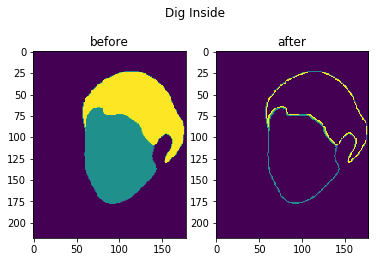

In [24]:
mask_shell = pdfd.utils.dig_inside(mask_array, [0, 128, 255])
print(mask_array.shape)
print(mask_shell.shape)
pdfd.utils.compare_plots(main_title="Dig Inside", imgs=[mask_array, mask_shell], titles=['before', 'after'])

In [25]:
# pdfd.utils.extract_coordinates(mask_shell, classes=['face'], values=[128])
# print(pdfd.utils.load_coordiantes_from_mask(mask_path, classes=['face'], values=[128]))
da = pdfd.utils.load_info_from_mask(MASK_DIR, mask_list[0], classes=['face'], values=[128])

In [26]:
print(mask_list[0])

136137.bmp


In [27]:
pdfd.utils.extend_info_into_json(da, 'abcd.json')

In [28]:
import tqdm

for mask in tqdm.tqdm(mask_list):
    _data = pdfd.utils.load_info_from_mask(MASK_DIR, mask, classes=['face'], values=[128])    
    json_dir = os.path.join(TRAIN_DIR, 'json')
    pdfd.utils.extend_info_into_json(_data, os.path.join(json_dir, mask.replace('bmp', 'json')))

100%|██████████| 3220/3220 [05:09<00:00, 10.40it/s]


In [ ]:
# import tqdm

# for mask in tqdm.tqdm(mask_list):
#    _data = pdfd.utils.load_info_from_mask(MASK_DIR, mask, classes=['face'], values=[128])    
#    pdfd.utils.extend_info_into_json(_data, os.path.join(TRAIN_DIR, 'mask_region_data.json'))


In [49]:
import json 

json_list = os.listdir(json_dir)

json_path = os.path.join(TRAIN_DIR, 'region_data.json')

pdfd.utils.extend_info_into_json({}, json_path)
with open(json_path, 'r', encoding="utf-8") as f:
    _data = json.load(f)

for data in tqdm.tqdm(json_list):
    _json_path = os.path.join(json_dir, data)
    with open(_json_path, 'r', encoding="utf-8") as f:
        _data.update(json.load(f))
        
pdfd.utils.extend_info_into_json(_data, json_path)
    
    

100%|██████████| 3220/3220 [00:00<00:00, 13180.25it/s]


---


In [57]:
import tqdm

val_json_dir = os.path.join(VAL_DIR, 'json')

for mask in tqdm.tqdm(v_mask_list):
    _data = pdfd.utils.load_info_from_mask(V_MASK_DIR, mask, classes=['face'], values=[128])    
    
    pdfd.utils.extend_info_into_json(_data, os.path.join(val_json_dir, mask.replace('bmp', 'json')))

100%|██████████| 336/336 [00:32<00:00, 10.42it/s]


In [58]:
import json



json_list = os.listdir(json_dir)
json_path = os.path.join(V_ORIGINAL_DIR, 'region_data.json')

pdfd.utils.extend_info_into_json({}, json_path)
with open(json_path, 'r', encoding="utf-8") as f:
    _data = json.load(f)
    
for data in tqdm.tqdm(json_list):
    _json_path = os.path.join(json_dir, data)
    with open(_json_path, 'r', encoding="utf-8") as f:
        _data.update(json.load(f))
        
pdfd.utils.extend_info_into_json(_data, json_path)

100%|██████████| 3220/3220 [00:00<00:00, 12955.49it/s]
